# GRIP : The Spark Foundation (Data Science and Business Analytics Intern)
# Batch : July 2021
## Author : V Sureshkumar
## **Task_5 (Exploratory Data Analysis - Sports)**

*__Import Libraries__*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_match = pd.read_csv('matches.csv')
df_match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
df_delivary = pd.read_csv('deliveries.csv')
df_delivary.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


*Shape of the data set*

In [4]:
print('Shape of matches data',df_match.shape)
print('Shape of deliveries data',df_delivary.shape)

Shape of matches data (756, 18)
Shape of deliveries data (179078, 21)


# Lets analysis "matches.csv" dataset

In [5]:
#let chack the type of value in columns and drop the unwanted datas
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:
# find the sum of null items
df_match.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [7]:
null_value_1 = df_match.isnull().sum().sum()
print('Total Null Values in matches.csv dataset is ' + str(null_value_1))

Total Null Values in matches.csv dataset is 656


In [8]:
# drop the umpire3 because it contain lot of null value
# drop other rows which contain null value
df_match = df_match.drop(columns=['umpire3'], axis =1)
df_match = df_match.dropna(how='any')

In [9]:
df_match.shape

(743, 17)

In [10]:
# cheak the matches.csv dataset if it's have a nan value or not
null_value_1 = df_match.isnull().sum().sum()
print('Total Null Values in matches.csv dataset is ' + str(null_value_1))

Total Null Values in matches.csv dataset is 0


In [11]:
df_match.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,743.000000,743.000000,743.000000,743.000000,743.000000
mean,1786.578735,2013.418573,0.025572,13.460296,3.375505
std,3455.045846,3.378787,0.157961,23.626205,3.393397
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,187.500000,2011.000000,0.000000,0.000000,0.000000
50%,374.000000,2013.000000,0.000000,0.000000,4.000000
75%,567.500000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [12]:
#let change the teams names with abbreviation of it
df_match.replace(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants', 'Delhi Capitals'], ['RCB', 'SRH', 'PW', 'MI', 'KKR', 'GL', 'KXIP', 'DD','CSK','RR', 'DC', 'KTK','PW','RPS','DC'],inplace =True)

**Now we have clenaed dataset of matches.csv, Now we analysis it**

**Winners in season wise**

In [13]:
seasonal_winner = df_match.groupby("season")["winner"].value_counts()
seasonal_winner

season  winner
2008    RR        13
        KXIP      10
        CSK        9
        DD         7
        MI         7
                  ..
2019    KKR        6
        KXIP       6
        SRH        6
        RCB        5
        RR         5
Name: winner, Length: 100, dtype: int64

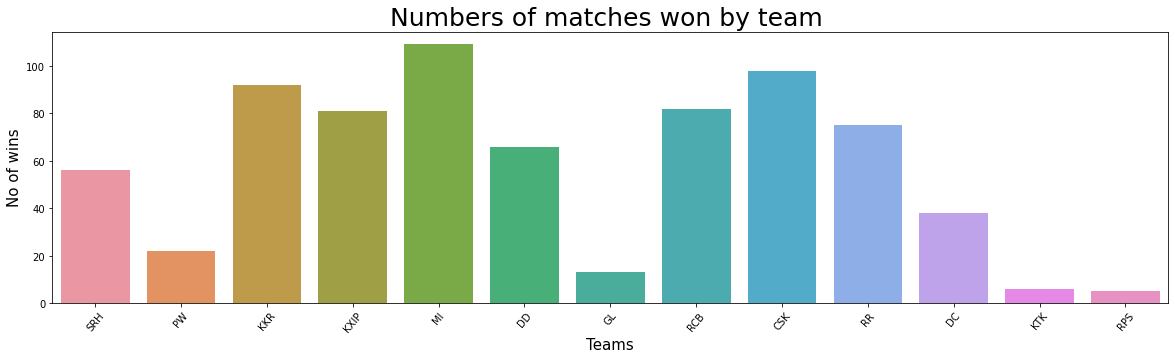

In [14]:
plt.figure(figsize = (20,5))
sns.countplot(x='winner',data=df_match)
plt.title("Numbers of matches won by team ",fontsize=25)
plt.xticks(rotation=50)
plt.xlabel("Teams",fontsize=15)
plt.ylabel("No of wins",fontsize=15)
plt.show()

**View the total of matches played in each season**

Text(0.5, 0, 'Season')

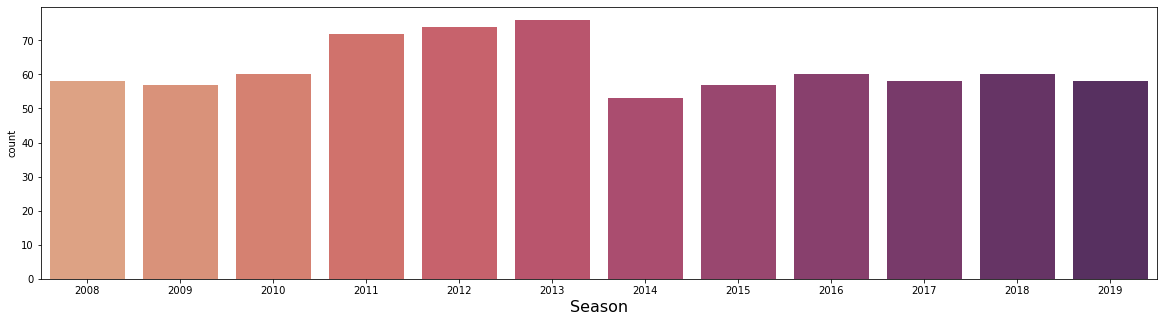

In [15]:
plt.figure(figsize=(20,5))
sns.countplot(x='season',data=df_match,palette='flare')
plt.xlabel('Season',fontsize=16)

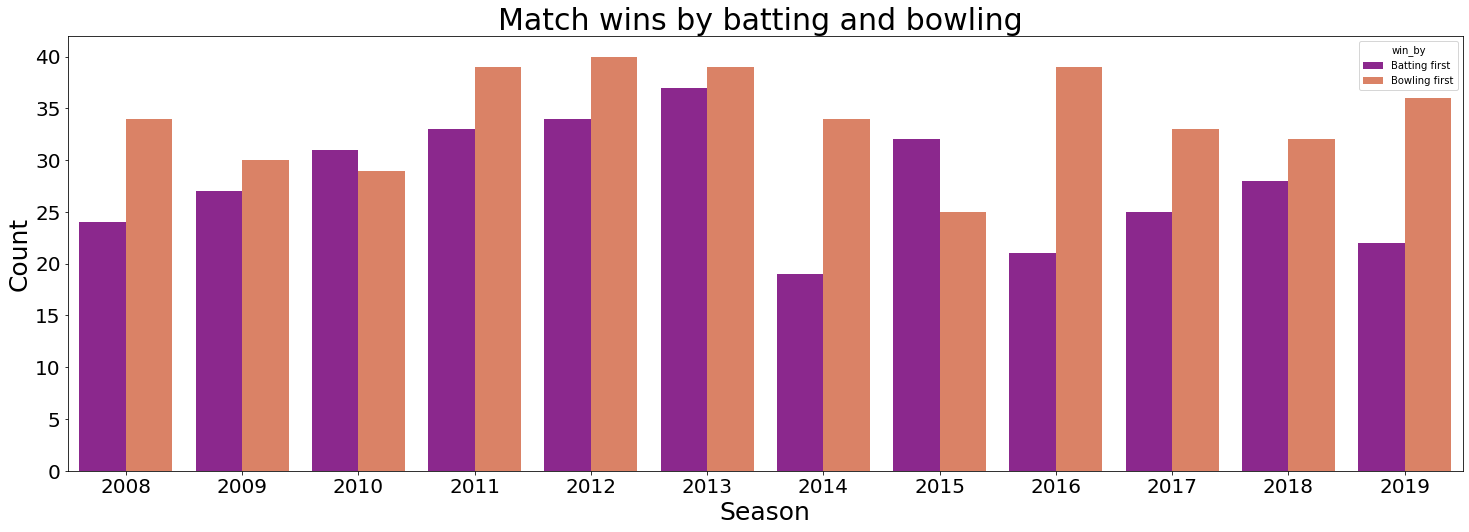

In [16]:
df_match['win_by']=np.where(df_match['win_by_runs']>0,'Batting first','Bowling first')
plt.figure(figsize = (25,8))
sns.countplot('season',hue='win_by',data=df_match,palette='plasma')
plt.title("Match wins by batting and bowling ",fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Season",fontsize=25)
plt.ylabel("Count",fontsize=25)
plt.show()

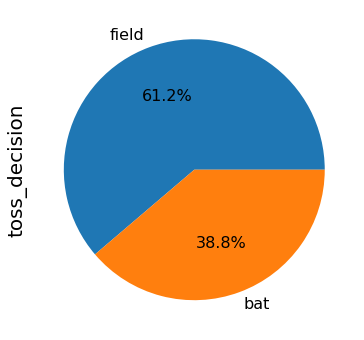

In [17]:
#View how many players choseing fielding or batting
field_bat = df_match["toss_decision"].value_counts()
field_bat.plot.pie(autopct="%.1f%%",figsize=(11, 6), fontsize= 16 )
plt.ylabel("toss_decision",fontsize=20)
explode = (0.1, 0) 

### From the above pie chart most of the team chose fielding first

<AxesSubplot:xlabel='venue', ylabel='count'>

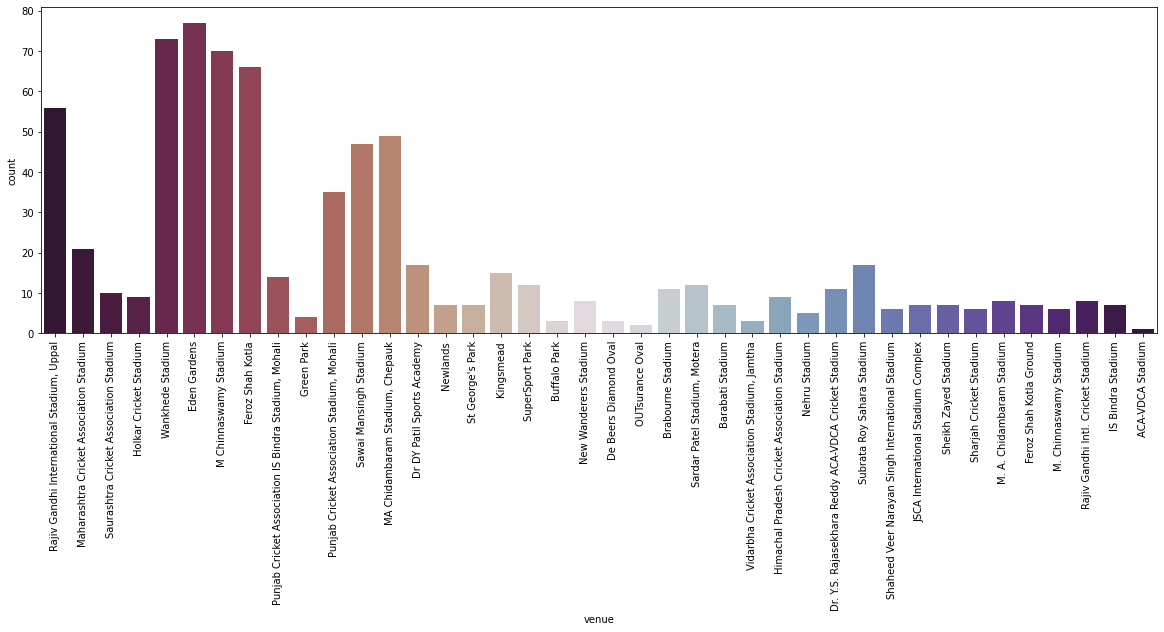

In [18]:
plt.figure(figsize = (20,6))
plt.xticks(rotation = 90)
sns.countplot(x = 'venue', data = df_match,palette='twilight_shifted_r')

## NAMES OF THE TOP 15 PLAYERS IN THE INDIAN PREMIER LEAGUE:

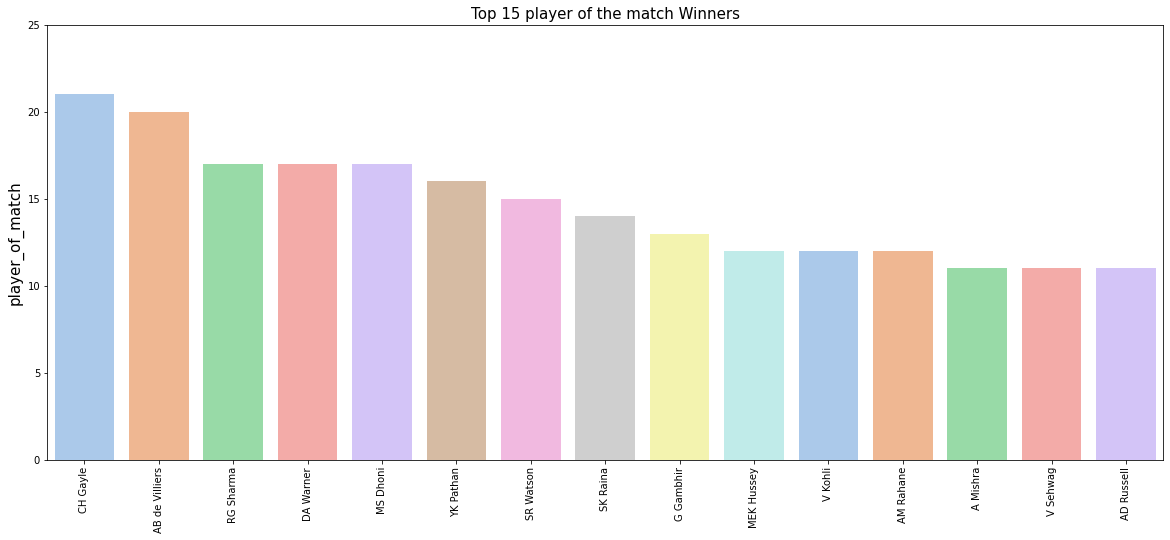

In [19]:
# plt.figure(figsize = (20,6))
plt.rcParams['figure.figsize'] = (20,8)
top_players = df_match.player_of_match.value_counts()[:15]
fig, ax = plt.subplots()
ax.set_ylim([0,25])
ax.set_ylabel("player_of_match",{'fontsize': 15})
ax.set_title("Top 15 player of the match Winners", {'fontsize': 15} )
top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v', palette="pastel");
plt.show()

# Lets analysis "deliveries.csv" dataset

In [20]:
df_delivary

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [21]:
#let change the teams names with abbreviation of it
df_delivary.replace(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants', 'Delhi Capitals'], ['RCB', 'SRH', 'PW', 'MI', 'KKR', 'GL', 'KXIP', 'DD','CSK','RR', 'DC', 'KTK','PW','RPS','DC'],inplace =True)

In [22]:
#let chack the type of value in columns and drop the unwanted datas
df_delivary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [23]:
# find the sum of null items
df_delivary.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

### Now we have clenaed dataset of matches.csv, Now we analysis it

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'V Kohli'),
  Text(1, 0, 'SK Raina'),
  Text(2, 0, 'RG Sharma'),
  Text(3, 0, 'S Dhawan'),
  Text(4, 0, 'G Gambhir'),
  Text(5, 0, 'RV Uthappa'),
  Text(6, 0, 'DA Warner'),
  Text(7, 0, 'MS Dhoni'),
  Text(8, 0, 'AM Rahane'),
  Text(9, 0, 'CH Gayle'),
  Text(10, 0, 'AB de Villiers'),
  Text(11, 0, 'KD Karthik'),
  Text(12, 0, 'AT Rayudu'),
  Text(13, 0, 'SR Watson'),
  Text(14, 0, 'PA Patel'),
  Text(15, 0, 'MK Pandey'),
  Text(16, 0, 'YK Pathan'),
  Text(17, 0, 'JH Kallis'),
  Text(18, 0, 'BB McCullum'),
  Text(19, 0, 'Yuvraj Singh'),
  Text(20, 0, 'M Vijay'),
  Text(21, 0, 'SR Tendulkar'),
  Text(22, 0, 'KA Pollard'),
  Text(23, 0, 'R Dravid'),
  Text(24, 0, 'SE Marsh')])

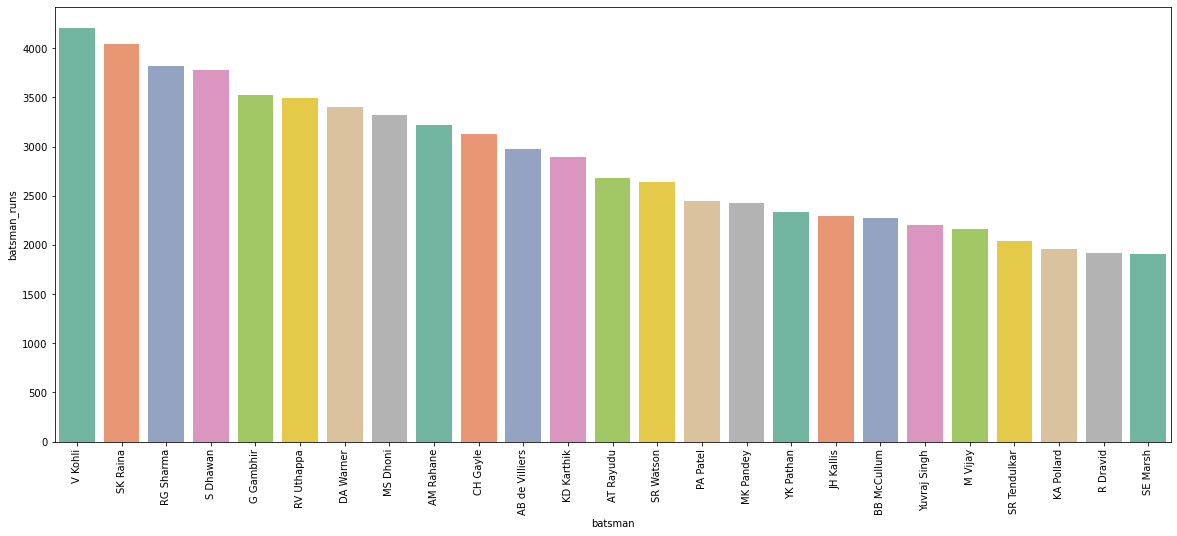

In [24]:
#NAMES OF THE BATSMAN WHO SCORED HIGHEST RUNS IN THE IPL
plt.figure(figsize=(20,8))
df_run = df_delivary['batsman'].value_counts().reset_index()
df_run.columns = ['batsman','batsman_runs']
sns.barplot(x = 'batsman',y = 'batsman_runs', data = df_run[:25], palette = 'Set2')
plt.xticks(rotation=90)

Text(0, 0.5, 'No. of fours')

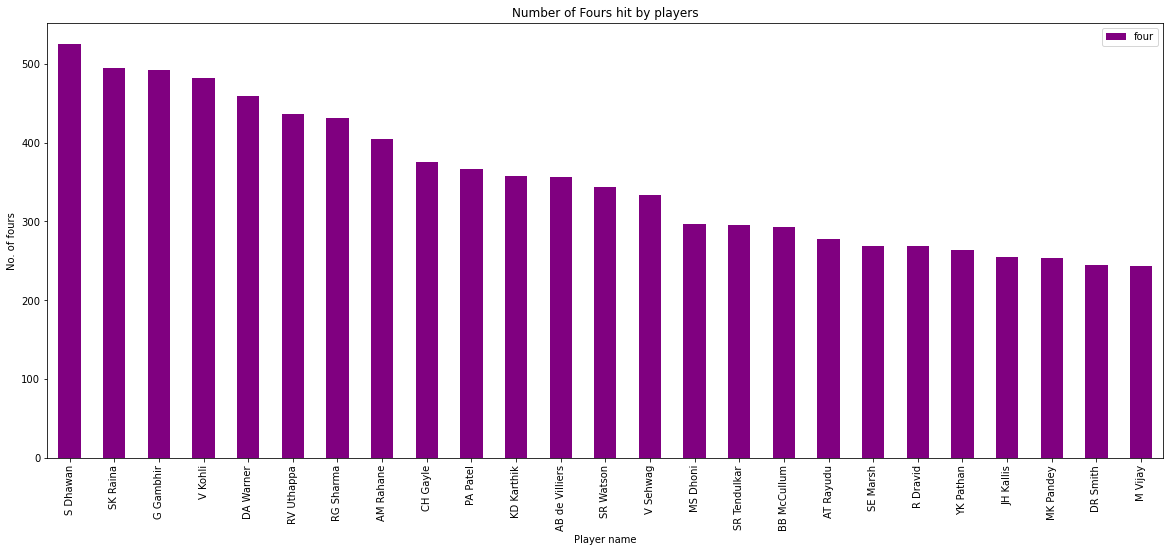

In [25]:
#COUNTS OF FOURS HIT BY THE PLAYERS
four=df_delivary[df_delivary['batsman_runs']==4]
batsman_4=four.groupby('batsman')['batsman_runs'].agg([('four','count')]).reset_index().sort_values('four',ascending=0)
ax=batsman_4.iloc[:25,:].plot('batsman','four',kind='bar',color='purple')
plt.title("Number of Fours hit by players")
plt.xticks(rotation=90)
plt.xlabel("Player name")
plt.ylabel("No. of fours")

Text(0, 0.5, 'No. of six')

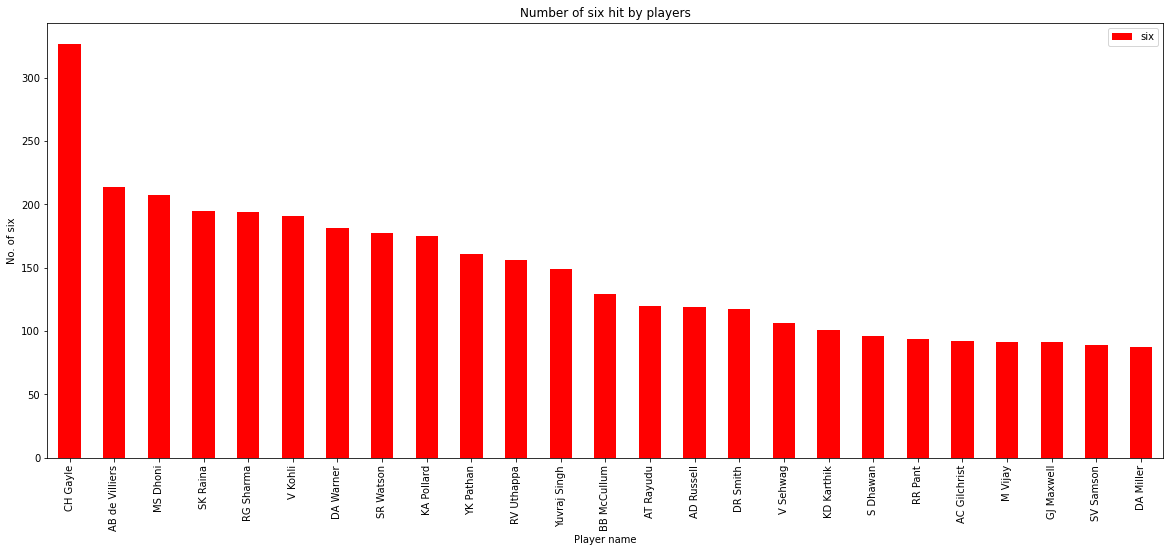

In [26]:
#COUNTS OF SIXES HIT BY THE PLAYERS:
six=df_delivary[df_delivary['batsman_runs']==6]
batsman_6=six.groupby('batsman')['batsman_runs'].agg([('six','count')]).reset_index().sort_values('six',ascending=0)
ax=batsman_6.iloc[:25,:].plot('batsman','six',kind='bar',color='red')
plt.title("Number of six hit by players")
plt.xticks(rotation=90)
plt.xlabel("Player name")
plt.ylabel("No. of six")

In [27]:
bat_first=df_match[df_match['win_by_runs']!=0]
bat_first.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,win_by
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,Batting first
8,9,2017,Pune,2017-04-11,DD,PW,PW,field,normal,0,DD,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,Batting first
13,14,2017,Kolkata,2017-04-15,KKR,SRH,SRH,field,normal,0,KKR,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,Batting first
14,15,2017,Delhi,2017-04-15,DD,KXIP,DD,bat,normal,0,DD,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,Batting first
16,17,2017,Bangalore,2017-04-16,PW,RCB,RCB,field,normal,0,PW,27,0,BA Stokes,M Chinnaswamy Stadium,KN Ananthapadmanabhan,C Shamshuddin,Batting first


Text(0.5, 1.0, 'Winner after batting first')

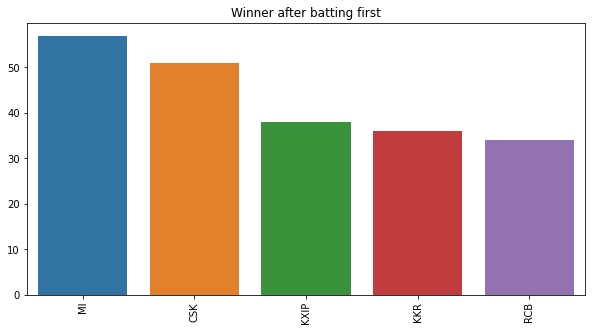

In [28]:
a=bat_first['winner'].value_counts().head()
plt.figure(figsize=(10,5))
sns.barplot(a.index,a.values)
plt.xticks(rotation=90)
plt.title('Winner after batting first')

Text(0.5, 1.0, 'most played bowlers')

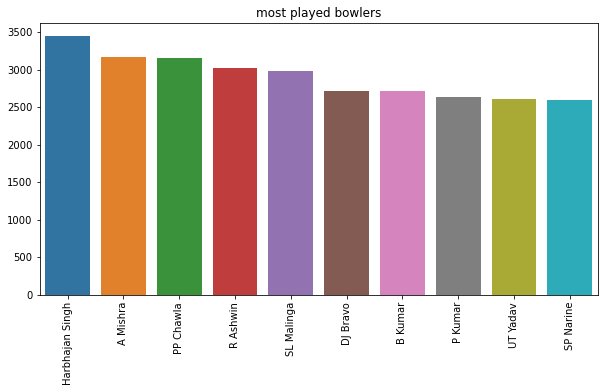

In [29]:
a=df_delivary['bowler'].value_counts().head(10)
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.barplot(a.index,a.values)
plt.title("most played bowlers")

Text(0.5, 1.0, 'Players with most sixes')

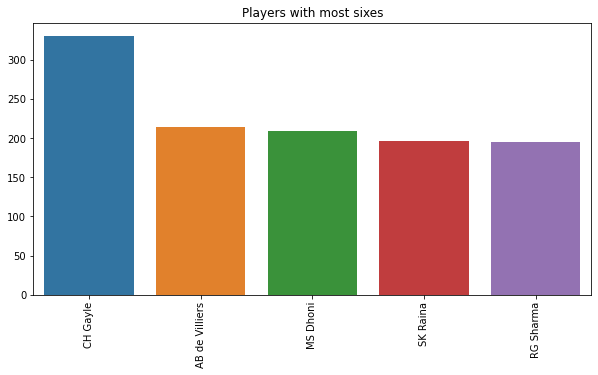

In [30]:
a=df_delivary['total_runs']>=6
b=df_delivary['batsman']
c=b[a].value_counts().head()
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.barplot(c.index,c.values)
plt.title("Players with most sixes")

In [31]:
df_delivary['dismissal_kind'].value_counts()


caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64

(array([], dtype=float64), [])

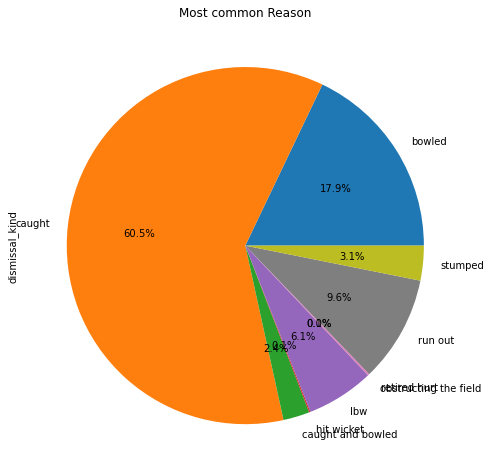

In [32]:
a = df_delivary.groupby('dismissal_kind')['dismissal_kind'].count()
plt.figure(figsize = (8,15))
plt.title("Most common Reason")
a.plot(kind='pie',autopct="%.1f%%")
plt.xticks(rotation=90)

<AxesSubplot:title={'center':'bowlers who took most wickets'}>

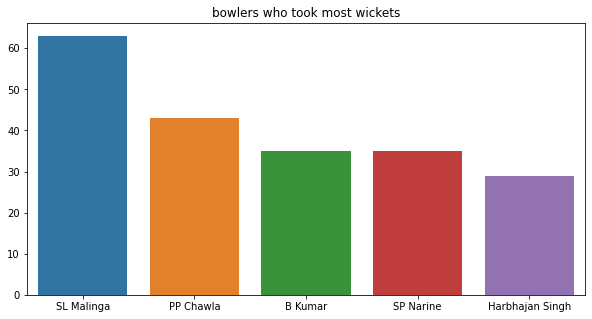

In [33]:
a=df_delivary['dismissal_kind']=='bowled'
b=df_delivary['bowler']
c=b[a].value_counts().head()
plt.figure(figsize=(10,5))
plt.title("bowlers who took most wickets")
sns.barplot(c.index,c.values)

Text(0.5, 1.0, 'Filders with most catches')

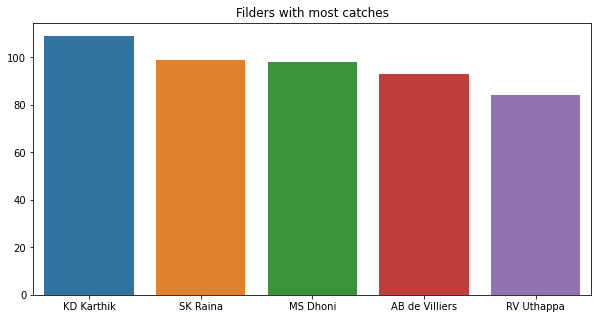

In [34]:
a=df_delivary['dismissal_kind']=='caught'
b=df_delivary['fielder']
c=b[a]
d=c.value_counts().head()
plt.figure(figsize=(10,5))
sns.barplot(d.index,d.values)
plt.title("Filders with most catches")

Text(0.5, 1.0, 'Fielders who took most wickets')

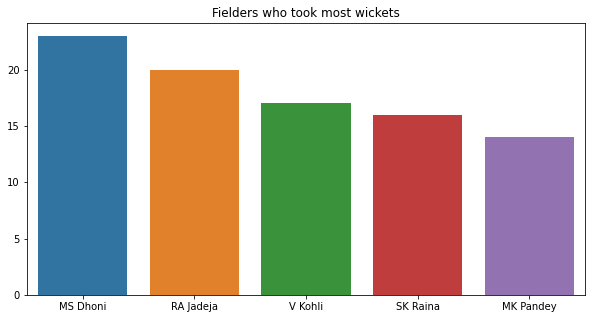

In [35]:
a=df_delivary['dismissal_kind']=='run out'
b=df_delivary['fielder']
c=b[a]
d=c.value_counts().head()
plt.figure(figsize=(10,5))
sns.barplot(d.index,d.values)
plt.title("Fielders who took most wickets")

Text(0.5, 1.0, 'Fielders who stumped most')

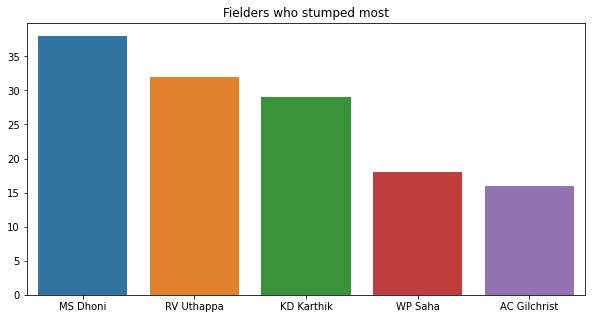

In [36]:
a=df_delivary['dismissal_kind']=='stumped'
b=df_delivary['fielder']
c=b[a]
d=c.value_counts().head()
plt.figure(figsize=(10,5))
sns.barplot(d.index,d.values)
plt.title('Fielders who stumped most')

<AxesSubplot:title={'center':'Number of times a player got Man of the Match'}>

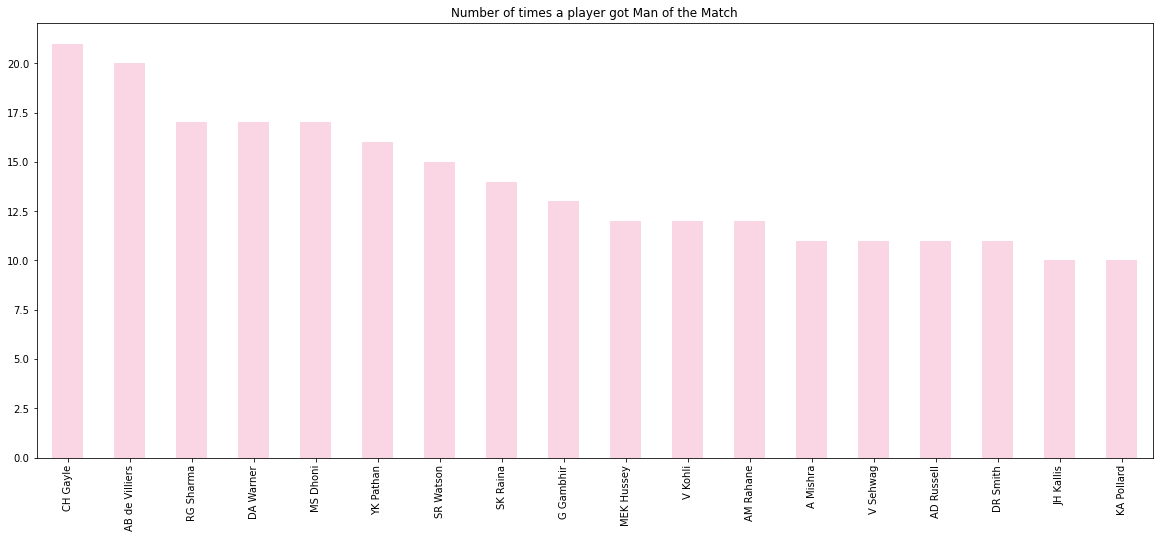

In [37]:
players = df_match.player_of_match.value_counts()
players[players >= 10 ].plot(kind = 'bar', title = 'Number of times a player got Man of the Match',color=(0.9, 0.2, 0.5, 0.2))

The above results show us that Chris Gayle and AB de Villiers are the players who were awarded player of the match most. This could mean that teams should try to invest on some of these players during the auction.

## FOLLOWING IS THE LIST OF CONCLUSIONS WE CAN MAKE FROM THE ABOVE DATA:

- Highest number of matches played in season - 2013

- Top players of the match winners - CH Gayle and ABD

- Highest number of decisions after toss - Fielding

- Highest number of four hits - Shikar Dhawan.

- Most number of matches played in stadium - Eden Garden

- Bowling teams has higher percentage of winning than the batting teams.

- Highest Wins After Winning the toss by the team - CSK

- Highest number of match won by the team - Mumbai Indians

- Winners After Batting First (Highest) - MI

- Highest number of six hits - CH gayle.

- Top player of match winning - CH gayle

- Top leading run scorer - V Kohli

- Highest number of matches played - SK Raina

- Most Played Bowler - Harbhajan Singh

- Fieler who took most wickets - MS Dhoni

- Fielder with most catches - KD Karthik

- Fieder who stumped the most - MS Dhoni

- Highest number of wickets by the Bowler - SL Malinga.

- In finals matches the teams which decide to do fielding first win the matches more then the team which bat first